In [1]:
!pip install dtreeviz

In [2]:
import pandas as pd
import numpy as np
import joblib
np.random.seed(123)

In [3]:
with open('my_val.pkl','rb') as f:
    data = joblib.load(f)
    print(data.keys())
locals().update(data)
del data

dict_keys(['x', 'y', 'val_x', 'val_y'])


In [4]:
def my_sam(x, y, t):
    target = x.loc[y[y==t].index]
    non_target = x.loc[y[y!=t].index].sample(len(target))
    my_sample = pd.concat([target, non_target])
    my_sample = my_sample.sample(len(my_sample))
    my_y = pd.concat([pd.Series(1, index=y.loc[target.index].index),
                      pd.Series(0, index=y.loc[non_target.index].index)])
    my_y = my_y.loc[my_sample.index]
    return my_sample, my_y

In [5]:
my_x, my_y = my_sam(x,y, 41)

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt.fit(my_x, my_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


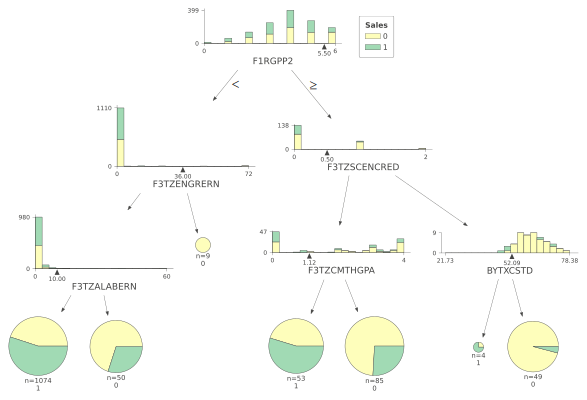

In [7]:
from dtreeviz.trees import *
viz = dtreeviz(dt, my_x, my_y, target_name='Sales', feature_names=my_x.columns,
               class_names=[0,1])
viz

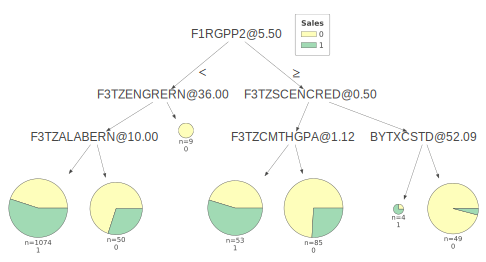

In [8]:
viz = dtreeviz(dt, my_x, my_y, target_name='Sales', feature_names=my_x.columns,
               class_names=[0,1], fancy=False)
viz

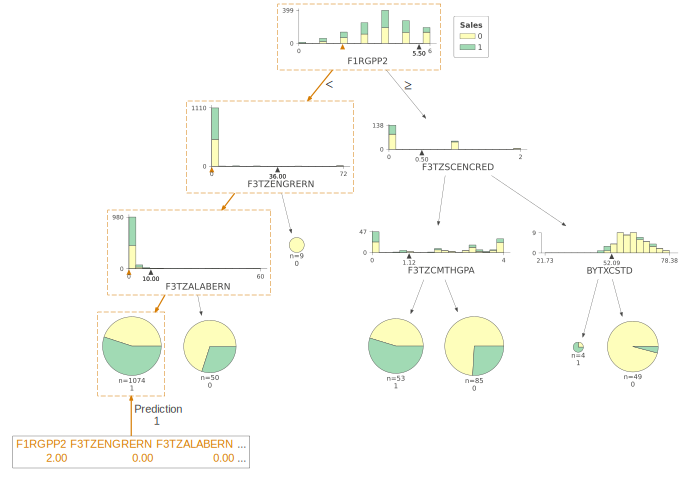

In [9]:
my_target = my_x.iloc[0]
viz = dtreeviz(dt, my_x, my_y, target_name='Sales', feature_names=my_x.columns,
               class_names=[0,1], X=my_target)
viz

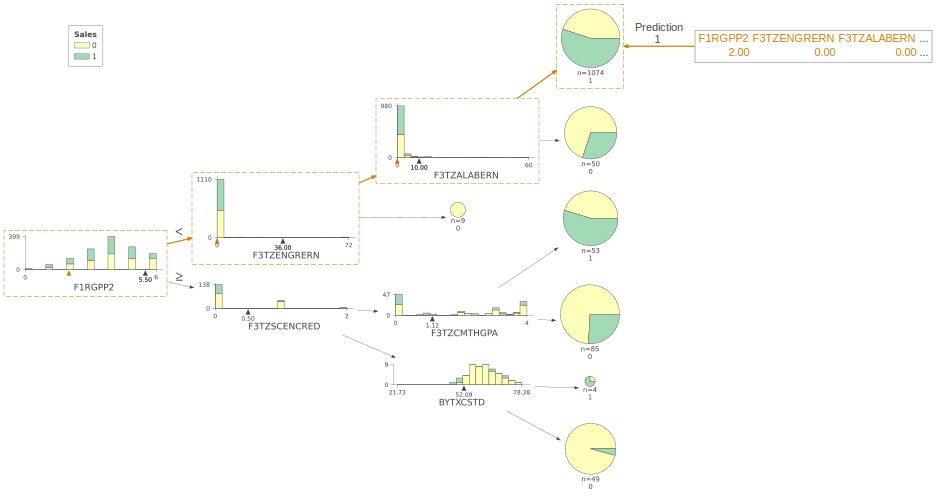

In [10]:
my_target = my_x.iloc[0]
viz = dtreeviz(dt, my_x, my_y, target_name='Sales', feature_names=my_x.columns,
               class_names=[0,1], X=my_target, orientation='LR')
viz

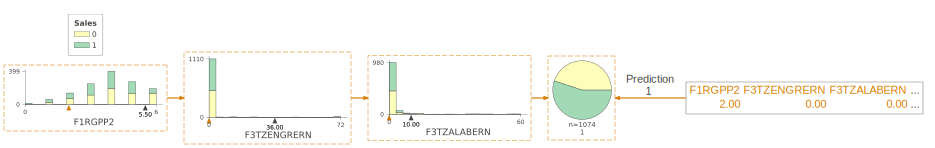

In [11]:
my_target = my_x.iloc[0]
viz = dtreeviz(dt, my_x, my_y, target_name='Sales', feature_names=my_x.columns,
               class_names=[0,1], X=my_target, orientation='LR', show_just_path=True)
viz